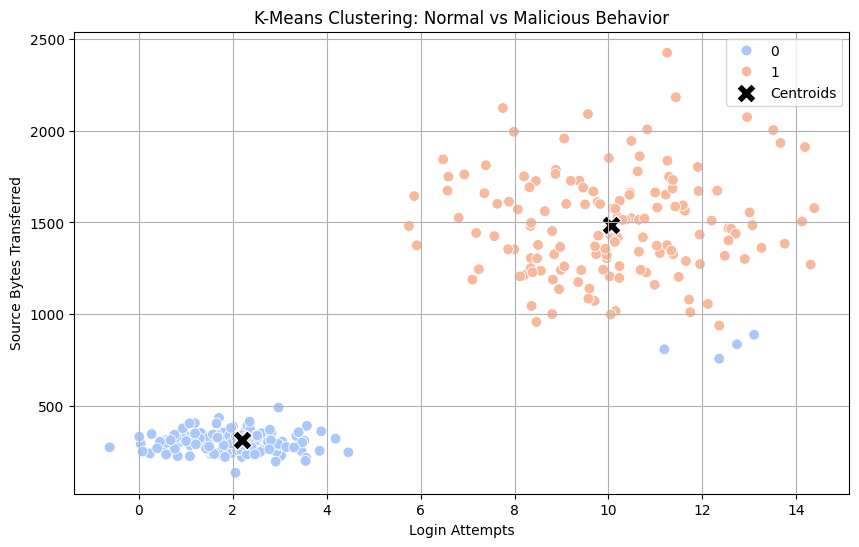

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#Loads the CSV dataset
df = pd.read_csv("/content/synthetic_cyber_dataset.csv")

#Extracts features (we ignore the label for unsupervised clustering)
X = df[["login_attempts", "src_bytes"]].values


#Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["login_attempts"],
    y=df["src_bytes"],
    hue=df["cluster"],
    palette="coolwarm",
    s=60
)

# Plots centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='black', s=200, marker='X', edgecolors='white', label='Centroids')

# Labels and titles
plt.title("K-Means Clustering: Normal vs Malicious Behavior")
plt.xlabel("Login Attempts")
plt.ylabel("Source Bytes Transferred")
plt.legend()
plt.grid(True)
plt.show()